## Import Libraries

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
data = pd.read_csv('credit_churn_data.xls', delimiter=",", engine="python")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Pre-processing

### Check Duplicates and Missing Values

In [ ]:
#drop unecessary columns
data = data.drop(columns=['RowNumber','CustomerId','Surname'], axis = 1)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


### Feature Engineering

In [ ]:
#convert categorical variables to numerical variables
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['Geography'], drop_first = False)

### Train-Test Split

In [ ]:
#features
X = data.drop(['Exited'], axis = 1)
#target
y = data['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
#create training dataset for analysis
train_df = pd.concat([X_train, y_train], axis=1)
train_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
9254,686,0,32,6,0.00,2,1,1,179093.26,True,False,False,0
1561,632,0,42,4,119624.60,2,1,1,195978.86,False,True,False,0
1670,559,0,24,3,114739.92,1,1,0,85891.02,False,False,True,1
6087,561,1,27,9,135637.00,1,1,0,153080.40,True,False,False,1
6669,517,0,56,9,142147.32,1,0,0,39488.04,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,0,54,8,69712.74,1,1,1,69381.05,True,False,False,0
5191,682,1,58,1,0.00,1,1,1,706.50,True,False,False,0
5390,735,1,38,1,0.00,3,0,0,92220.12,True,False,False,1
860,667,0,43,8,190227.46,1,1,0,97508.04,True,False,False,1


## Exploratory Data Analysis (EDA)

### Univariate Analysis

**Categorical Distribution**

<ipython-input-60-5aa24a4fd750>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Tenure', ax=axs[0], palette = custom)
<ipython-input-60-5aa24a4fd750>:5: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=train_df, x='Tenure', ax=axs[0], palette = custom)
<ipython-input-60-5aa24a4fd750>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='NumOfProducts', ax=axs[1], palette = custom)
<ipython-input-60-5aa24a4fd750>:9: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(data=train_df, x='NumOfProducts',

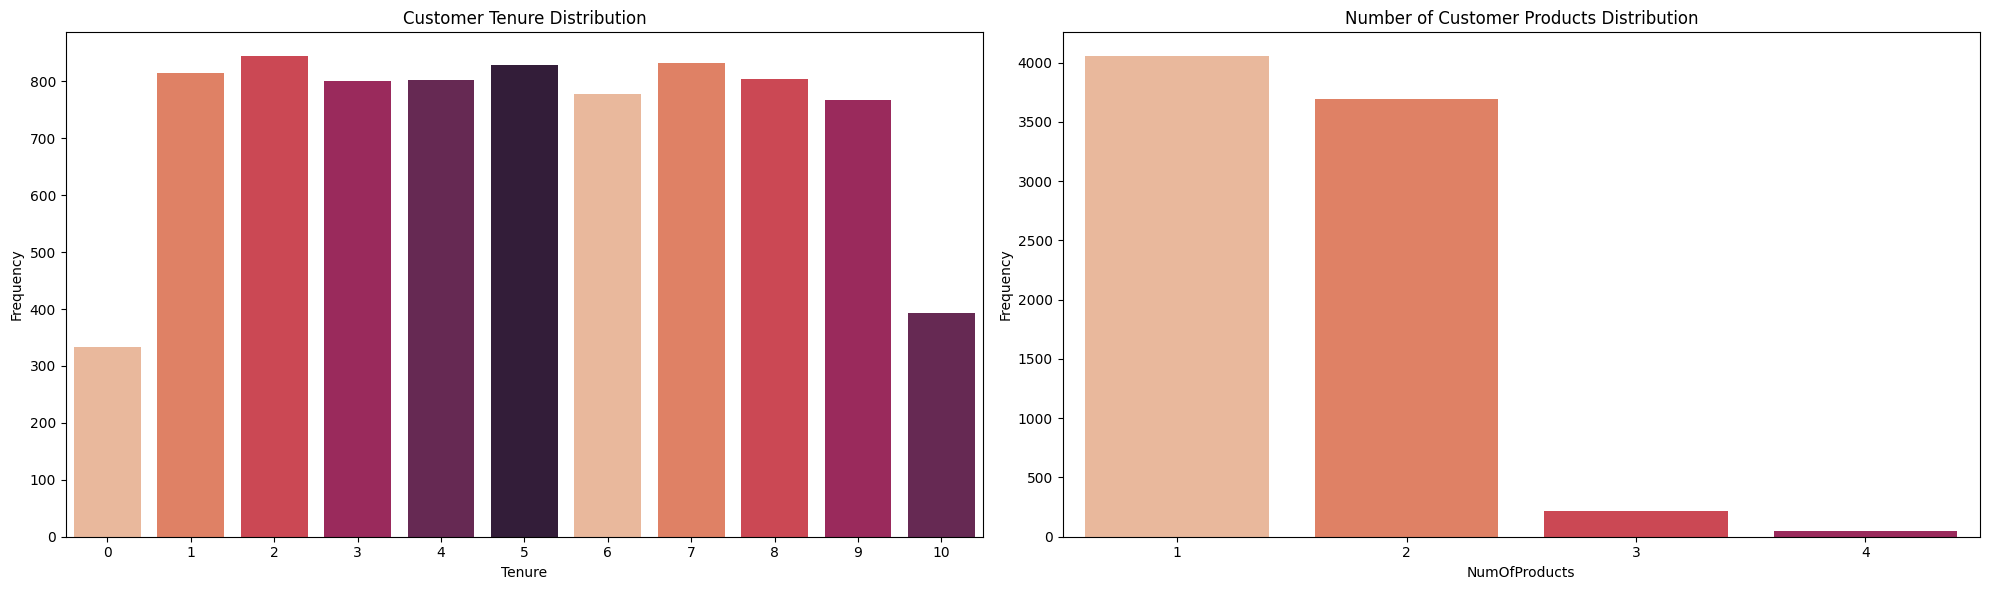

In [ ]:
#plot barchart
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

custom = sns.color_palette('rocket_r')
sns.countplot(data=train_df, x='Tenure', ax=axs[0], palette = custom)
axs[0].set_title('Customer Tenure Distribution')
axs[0].set_ylabel('Frequency')

sns.countplot(data=train_df, x='NumOfProducts', ax=axs[1], palette = custom)
axs[1].set_title('Number of Customer Products Distribution')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#count
geography = ['Geography_France','Geography_Germany','Geography_Spain']
geo_counts = train_df[geography].sum()

gender_counts = train_df['Gender'].value_counts()

cr_card_counts = train_df['HasCrCard'].value_counts()

active_member_counts = train_df['IsActiveMember'].value_counts()

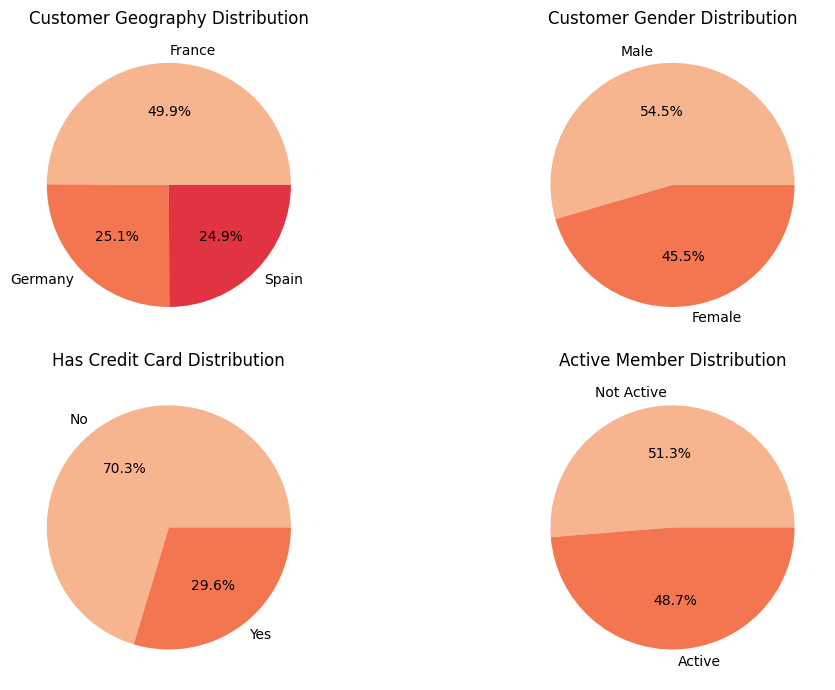

In [ ]:
#plot piechart
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

axs[0,0].pie(geo_counts, labels=['France','Germany','Spain'], autopct="%1.1f%%", colors = sns.color_palette('rocket_r'))
axs[0,0].set_title('Customer Geography Distribution')

axs[0,1].pie(gender_counts, labels=['Male','Female'], autopct="%1.1f%%", colors = sns.color_palette('rocket_r'))
axs[0,1].set_title('Customer Gender Distribution')

axs[1,0].pie(cr_card_counts, labels=['No', 'Yes'], autopct="%1.1f%%", colors = sns.color_palette('rocket_r'))
axs[1,0].set_title('Has Credit Card Distribution')

axs[1,1].pie(active_member_counts, labels=['Not Active', 'Active'], autopct="%1.1f%%", colors = sns.color_palette('rocket_r'))
axs[1,1].set_title('Active Member Distribution')

plt.tight_layout()
plt.show()

**Statistical Analysis**

In [ ]:
train_df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,651.647625,0.454750,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764,0.205500
std,96.366200,0.497979,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431,0.404092
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,585.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,0.000000
50%,653.000000,0.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000,0.000000
75%,719.000000,1.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


**Check Outliers**

In [ ]:
numerical_features = train_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]

<ipython-input-63-d42a61335012>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=numerical_features[column], palette = custom)
<ipython-input-63-d42a61335012>:4: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.boxplot(x=numerical_features[column], palette = custom)


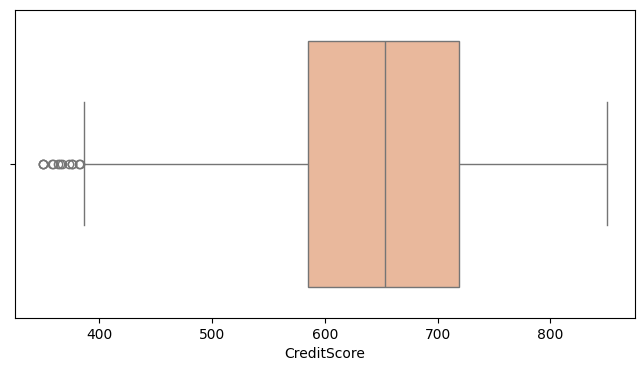

<ipython-input-63-d42a61335012>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=numerical_features[column], palette = custom)
<ipython-input-63-d42a61335012>:4: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.boxplot(x=numerical_features[column], palette = custom)


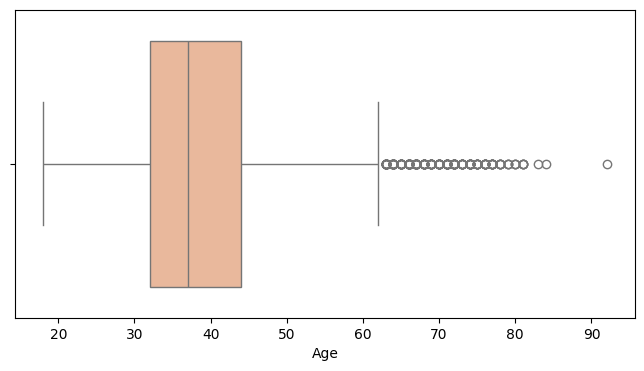

<ipython-input-63-d42a61335012>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=numerical_features[column], palette = custom)
<ipython-input-63-d42a61335012>:4: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.boxplot(x=numerical_features[column], palette = custom)


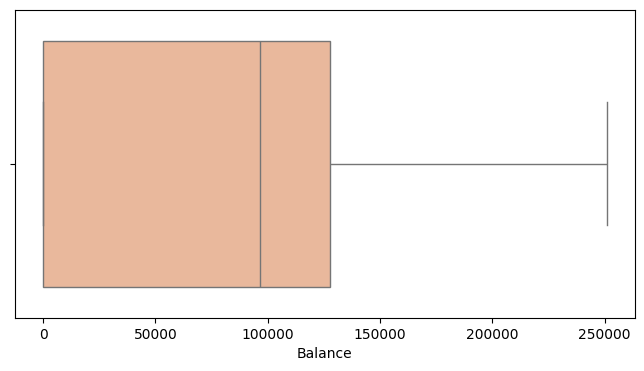

<ipython-input-63-d42a61335012>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=numerical_features[column], palette = custom)
<ipython-input-63-d42a61335012>:4: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.boxplot(x=numerical_features[column], palette = custom)


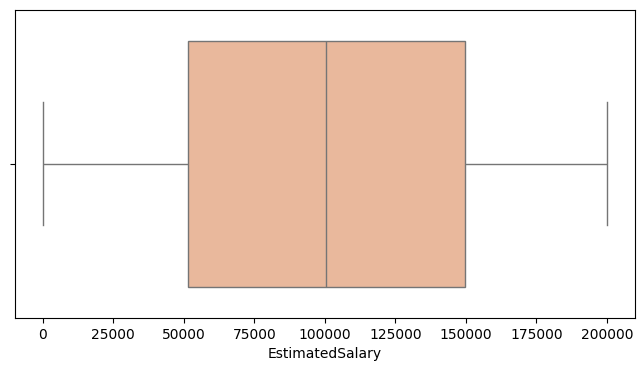

In [ ]:
#create boxplot
for column in numerical_features.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numerical_features[column], palette = custom)
    plt.show()

**Numerical Data Distribution**

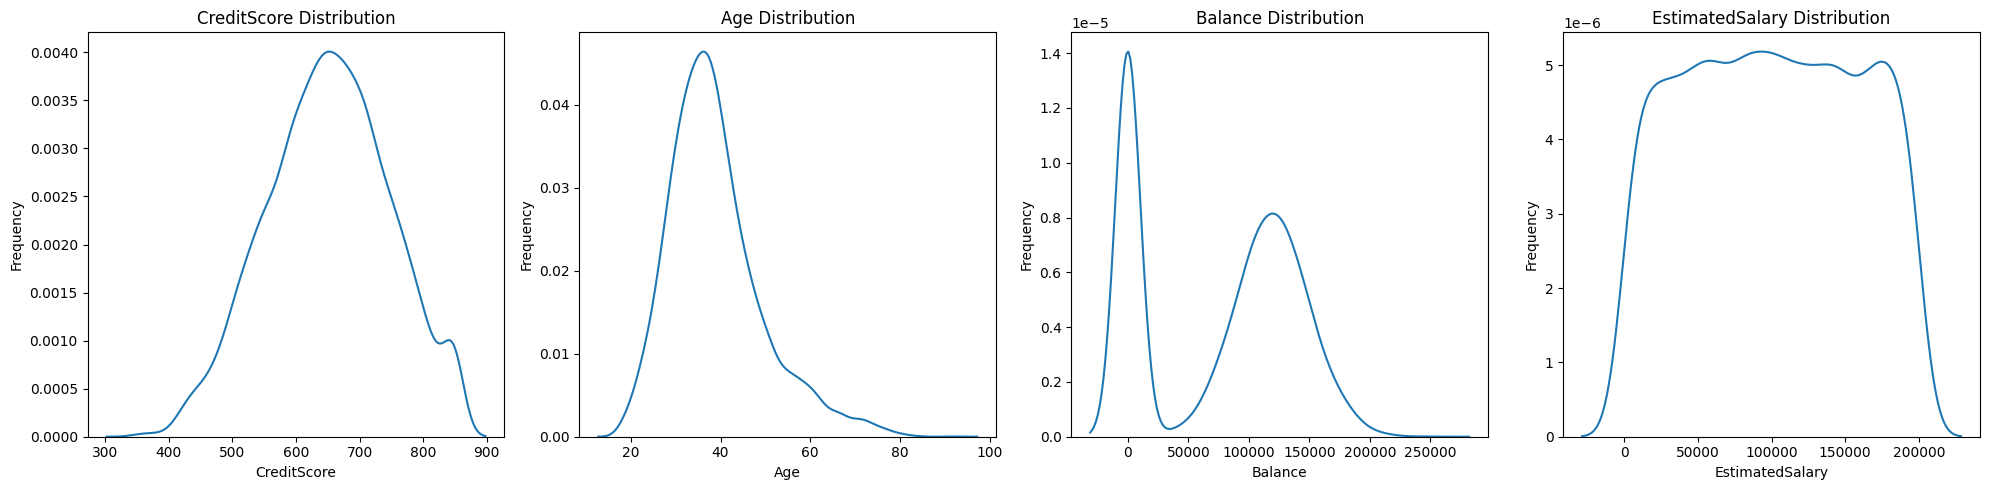

In [ ]:
#plot distribution plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, feature in enumerate(numerical_features.columns):
    sns.kdeplot(train_df[feature], ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Churn Distribution**

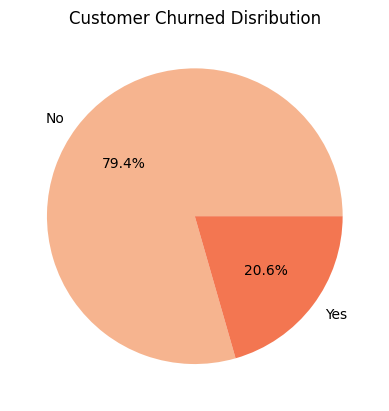

In [ ]:
#plot piechart
exit_count = train_df['Exited'].value_counts()
plt.pie(exit_count.values, labels=['No','Yes'], autopct="%1.1f%%", colors = sns.color_palette('rocket_r'))
plt.title('Customer Churned Disribution')
plt.show()

### Multivariate Analysis

**Numerical Data Distribution by Exit Status**

<ipython-input-69-8df3d1ea9ba1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df['Exited'], y=train_df[feature], palette = custom)
<ipython-input-69-8df3d1ea9ba1>:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=train_df['Exited'], y=train_df[feature], palette = custom)
<ipython-input-69-8df3d1ea9ba1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df['Exited'], y=train_df[feature], palette = custom)
<ipython-input-69-8df3d1ea9ba1>:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=train_df['Exited'], y=train_df[feature], palette = custom)
<ipyth

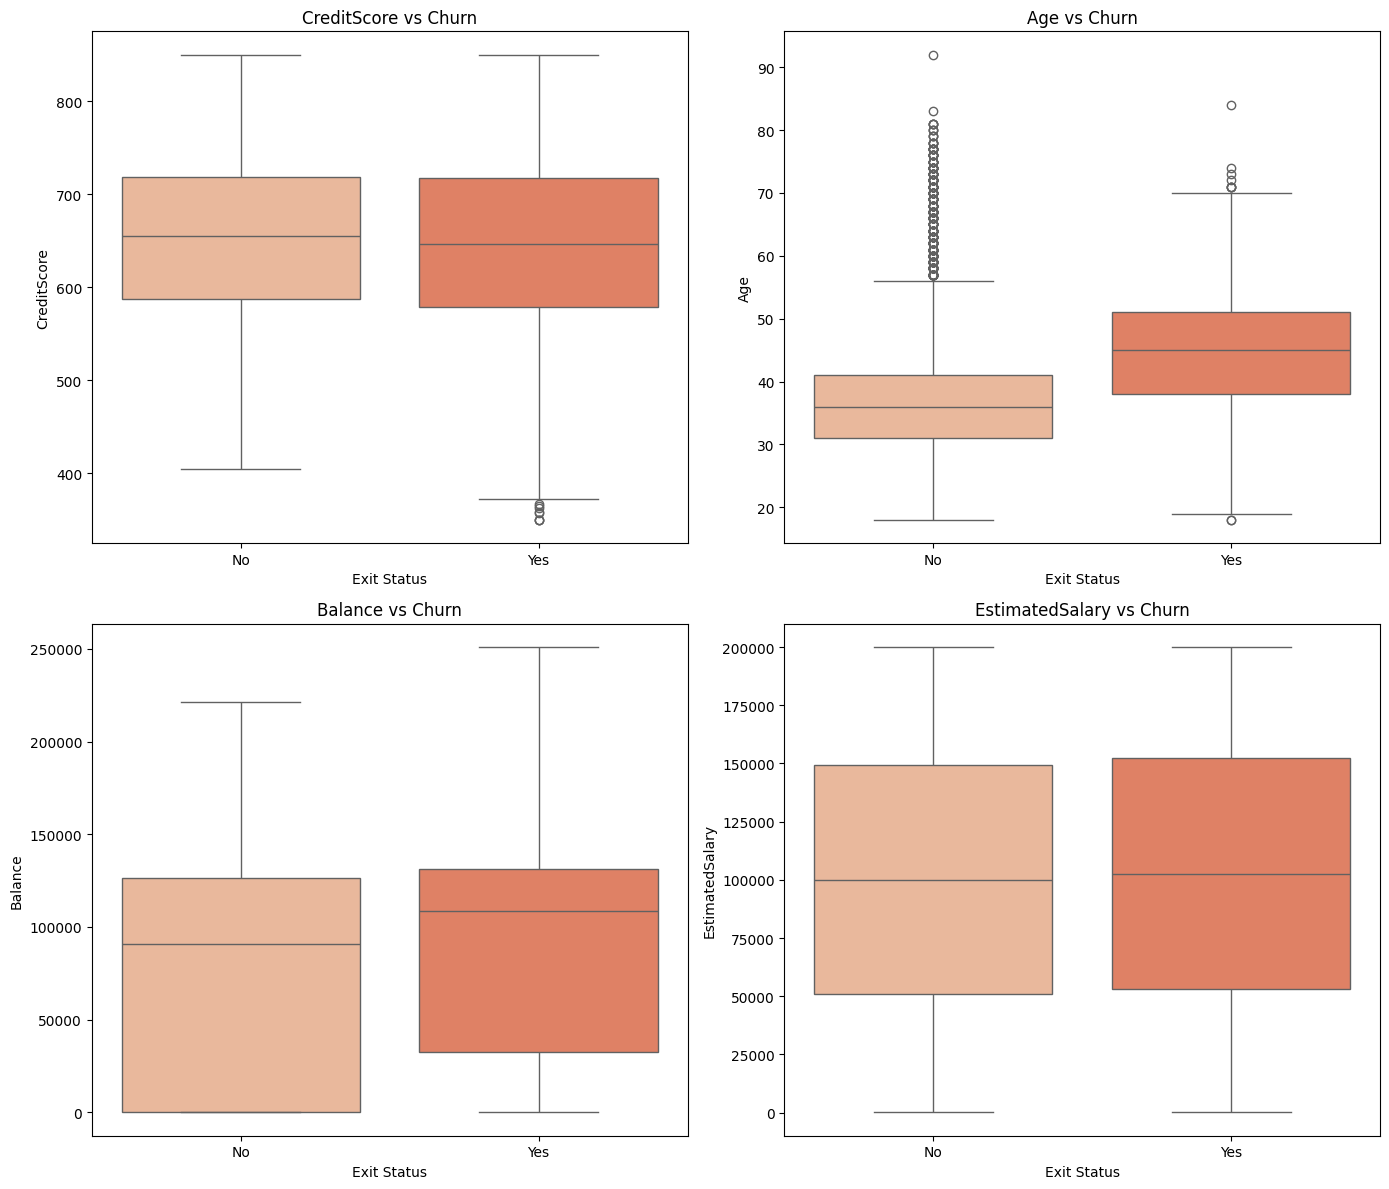

In [ ]:
plt.figure(figsize=(14, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_df['Exited'], y=train_df[feature], palette = custom)
    plt.title(f'{feature} vs Churn')
    plt.xlabel('Exit Status')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation = 360)
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

**Categorical Data Distribution by Exit Status**

<ipython-input-70-1a2f30c05757>:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue=train_df['Exited'], data=train_df, palette = custom)
<ipython-input-70-1a2f30c05757>:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue=train_df['Exited'], data=train_df, palette = custom)
<ipython-input-70-1a2f30c05757>:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue=train_df['Exited'], data=train_df, palette = custom)
<ipython-input-70-1a2f30c05757>:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue=train_df['Exited'], data=train_df, palette = custom)


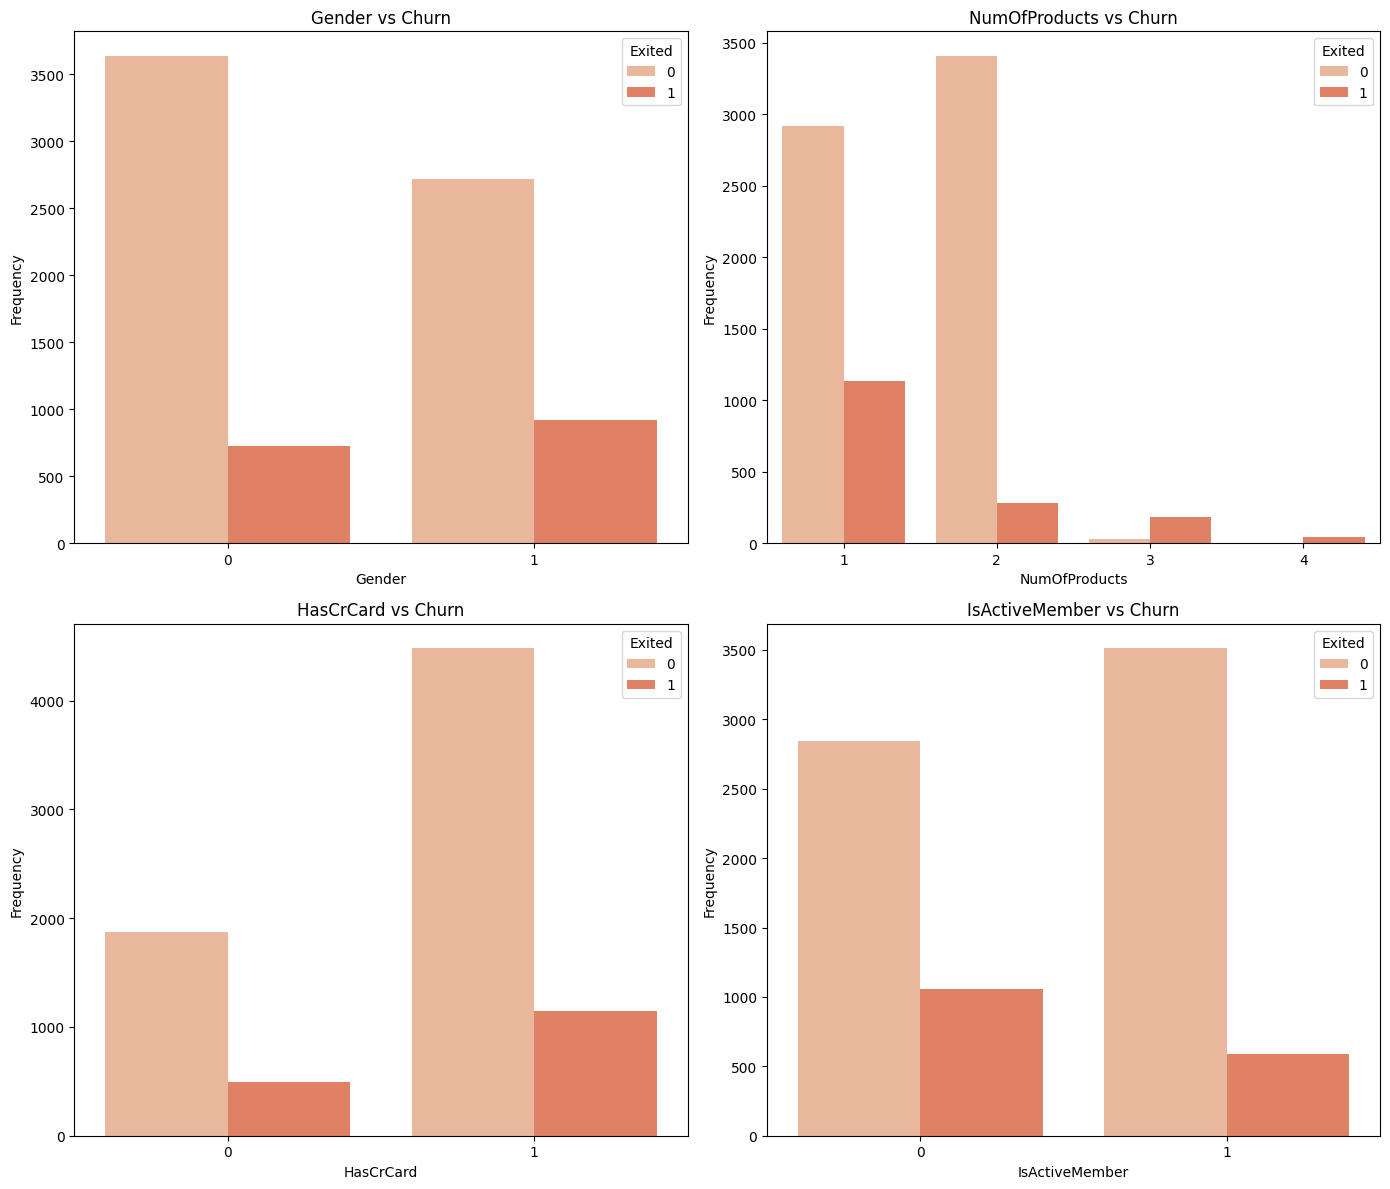

In [ ]:
categorical_features = X_train[['Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]

plt.figure(figsize=(14, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue=train_df['Exited'], data=train_df, palette = custom)
    plt.title(f'{feature} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Correlation Analysis**

<Axes: >

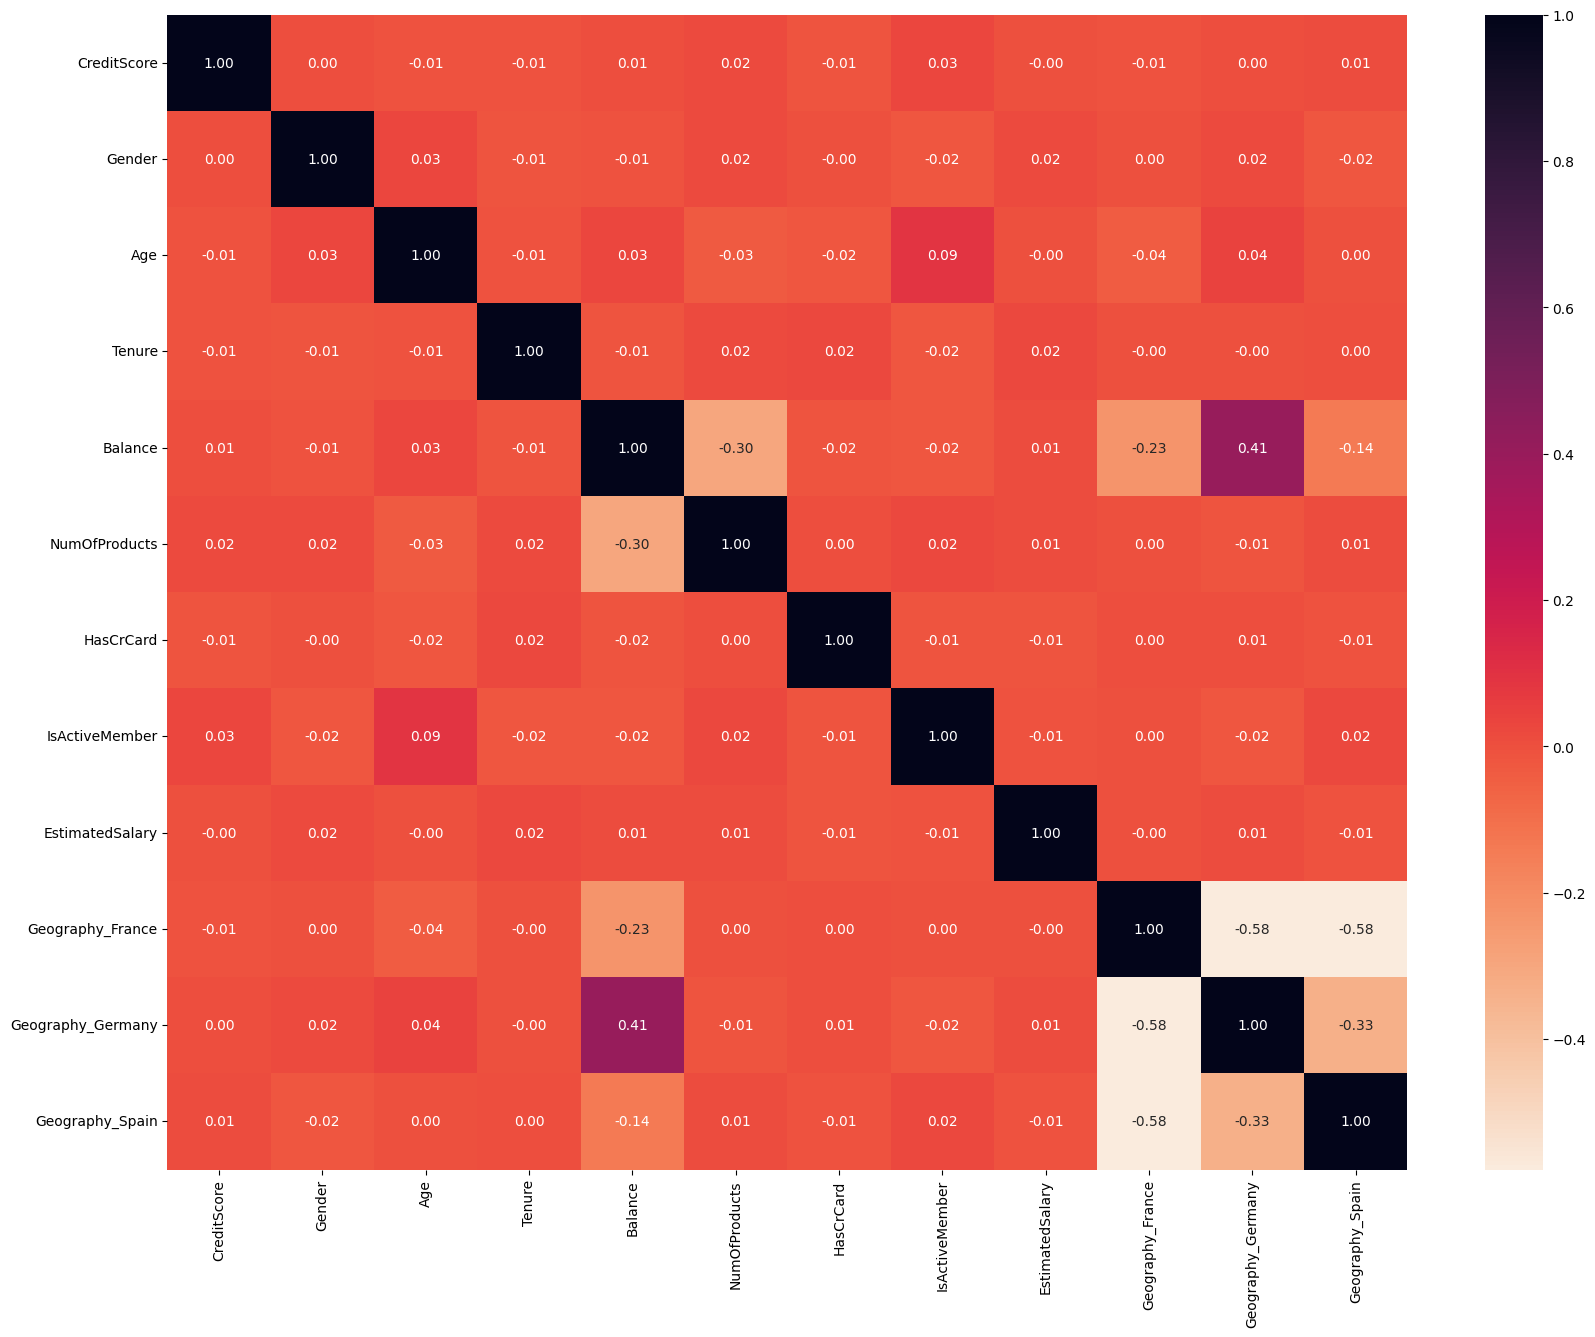

In [ ]:
#correlation heatmap
corr_= X_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap="rocket_r")

There are no highly correlated variables (<0.8), we can leave the variable columns as it is.

## Data Scaling

In [ ]:
#features
X_train = train_df.drop(['Exited'], axis = 1)
#target
y_train = train_df['Exited']

In [ ]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling

In [ ]:
#define parameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}
#grid search with cross validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1')

In [ ]:
#best parameter
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 10, 'kernel': 'rbf'}


In [ ]:
#predict
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

## Evaluation

In [ ]:
#evaluation of base model
print("F1-score:", f1_score(y_test, y_pred_best))
print("Classification Report of Base Model:\n", classification_report(y_test, y_pred_best))

F1-score: 0.5674418604651162
Classification Report of Base Model:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



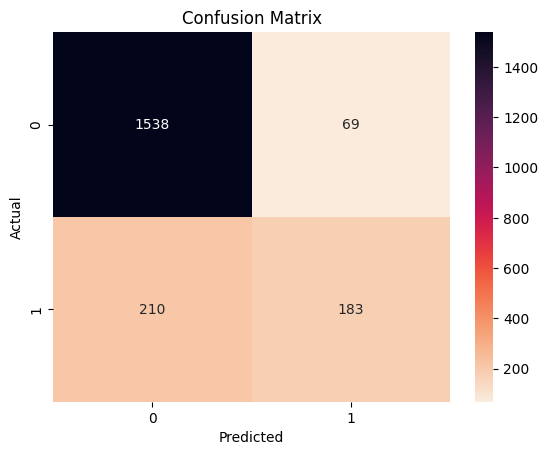

In [ ]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rocket_r")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Feature Importance

Permutation Feature Importances for Non-Linear SVM:
               feature  importance
2                 Age    0.176822
5       NumOfProducts    0.163236
4             Balance    0.082301
7      IsActiveMember    0.066399
10  Geography_Germany    0.044027
11    Geography_Spain    0.018520
9    Geography_France    0.015892
6           HasCrCard    0.005872
0         CreditScore    0.000560
1              Gender   -0.000173
3              Tenure   -0.003077
8     EstimatedSalary   -0.006922


<ipython-input-79-dd21ac872087>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette = custom)
<ipython-input-79-dd21ac872087>:14: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette = custom)


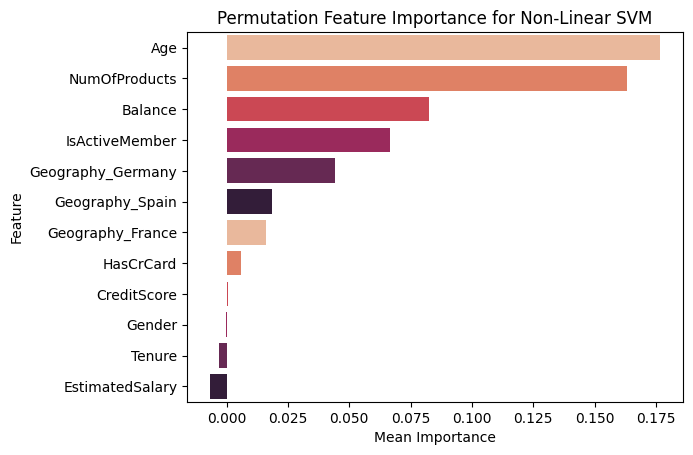

In [ ]:
#the best svm is non-linear (rbf)
#calculate permutation importance
perm_importance = permutation_importance(best_svm, X_test, y_test, scoring='f1')

#create dataframe
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
    }).sort_values(by='importance', ascending=False)

print("Permutation Feature Importances for Non-Linear SVM:\n", feature_importance_df)

#plot
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette = custom)
plt.title("Permutation Feature Importance for Non-Linear SVM")
plt.xlabel("Mean Importance")
plt.ylabel("Feature")
plt.show()

## Prediction

In [ ]:
np.set_printoptions(threshold=np.inf) #show all values
y_pred_best = best_svm.predict(X_test)
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test
print(np.concatenate((y_pred_best.reshape(len(y_pred_best),1), y_test_array.reshape(len(y_test_array),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]